# Spatial Weighting ****

#### Tutorial from https://geographicdata.science/book/notebooks/04_spatial_weights.html

This tutorial demonstrates how to create spatial weighting matrices and visualize them. A very useful tutorial.

In [2]:
!pip install pysal

     |████████████████████████████████| 108 kB 9.5 MB/s eta 0:00:01
     |████████████████████████████████| 2.4 MB 14.4 MB/s eta 0:00:01
     |████████████████████████████████| 71 kB 11.6 MB/s eta 0:00:01
     |████████████████████████████████| 60 kB 11.4 MB/s eta 0:00:01
     |████████████████████████████████| 55 kB 7.3 MB/s  eta 0:00:01
     |████████████████████████████████| 83 kB 3.1 MB/s  eta 0:00:01
     |████████████████████████████████| 43 kB 4.5 MB/s  eta 0:00:01
     |████████████████████████████████| 41 kB 1.5 MB/s  eta 0:00:01
     |████████████████████████████████| 265 kB 16.7 MB/s eta 0:00:01
     |████████████████████████████████| 5.7 MB 9.1 MB/s eta 0:00:01
     |████████████████████████████████| 118 kB 45.3 MB/s eta 0:00:01
     |████████████████████████████████| 226 kB 29.6 MB/s eta 0:00:01
     |████████████████████████████████| 229 kB 31.9 MB/s eta 0:00:01
     |████████████████████████████████| 230 kB 42.5 MB/s eta 0:00:01
     |████████████████████████████████| 55

     |████████████████████████████████| 128 kB 47.8 MB/s eta 0:00:01
  Created wheel for pysal: filename=pysal-2.3.0-py3-none-any.whl size=18421 sha256=38d65591912be2099446d58edb69f213cefd0ce63f8b3620f565cc0e3bcc5098
  Stored in directory: /home/jtl/.cache/pip/wheels/16/d7/12/68afc9e3d3247ccc9ee3d803cee4082d18c9bb95448513398e
  Created wheel for libpysal: filename=libpysal-4.3.0-py2.py3-none-any.whl size=2379082 sha256=cf39e30e09a7ed3969ab4bd299385d4d4f58decacc9accd3b121deea177f8194
  Stored in directory: /home/jtl/.cache/pip/wheels/a9/33/82/a0dde6150f4719939514a575369d4b49f89f5525feabc6d997
  Created wheel for esda: filename=esda-2.3.1-py3-none-any.whl size=82450 sha256=07ac90df634701f9f562957ba2fd1ab169ce856fad169818a0534e89bf0aae5b
  Stored in directory: /home/jtl/.cache/pip/wheels/34/37/c4/c2df5658c3201d2fdf315c2ac2a50fb73e1f1930a950429d1d
  Created wheel for inequality: filename=inequality-1.0.0-py3-none-any.whl size=11801 sha256=c425807a3b61266b2158b7d144563e5d6455563b1ff3ffeb6ff

In [7]:
%matplotlib inline

from pysal.lib import weights
from pysal.lib import cg as geometry
import contextily
import geopandas
import seaborn
import pandas 
import numpy
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

In [11]:
# Get points in a grid
l = numpy.arange(3)
xs, ys = numpy.meshgrid(l, l)
xs, ys

(array([[0, 1, 2],
        [0, 1, 2],
        [0, 1, 2]]),
 array([[0, 0, 0],
        [1, 1, 1],
        [2, 2, 2]]))

In [13]:
# Set up store
polys = []
# Generate polygons
for x, y in zip(xs.flatten(), ys.flatten()): # sw: learn to use zip.
    poly = Polygon([(x, y), (x+1, y), (x+1, y+1), (x, y+1)]) # sw: use Polygon to create geometry obj.
    polys.append(poly)
polys    

In [14]:
# Convert to GeoSeries
polys = geopandas.GeoSeries(polys) # sw: learn to create a geo data series
gdf = geopandas.GeoDataFrame({'geometry': polys, # sw: create a geo df from a geo series.
                              'id': ['P-%s'%str(i).zfill(2) for i in range(len(polys))]})
gdf

,geometry,id
0,"POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....",P-00
1,"POLYGON ((1.00000 0.00000, 2.00000 0.00000, 2....",P-01
2,"POLYGON ((2.00000 0.00000, 3.00000 0.00000, 3....",P-02
3,"POLYGON ((0.00000 1.00000, 1.00000 1.00000, 1....",P-03
4,"POLYGON ((1.00000 1.00000, 2.00000 1.00000, 2....",P-04
5,"POLYGON ((2.00000 1.00000, 3.00000 1.00000, 3....",P-05
6,"POLYGON ((0.00000 2.00000, 1.00000 2.00000, 1....",P-06
7,"POLYGON ((1.00000 2.00000, 2.00000 2.00000, 2....",P-07
8,"POLYGON ((2.00000 2.00000, 3.00000 2.00000, 3....",P-08


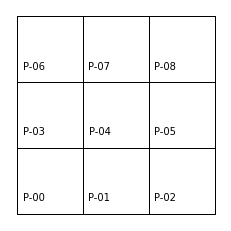

In [16]:
# visualize the mesh
ax = gdf.plot(facecolor='w', edgecolor='k') # sw: visualize the mesh as a geopandas object.
[plt.text(x, y, t, 
          verticalalignment='center',
          horizontalalignment='center') for x, y, t in zip(
          [p.centroid.x-.25 for p in polys],
          [p.centroid.y-.25 for p in polys],
          [i for i in gdf['id']])] # sw: iterate over texts. p is an object to use. 
ax.set_axis_off()
plt.show()

In [26]:
# Rook contiguity
# do a regular 3x3 lattice and draw it here
w = weights.contiguity.Rook.from_dataframe(gdf) # sw: here is how to turn a geo df to a graph!
w.neighbors
# sw: w is a very versertile obj. Learn it. 

{0: [1, 3],
 1: [0, 2, 4],
 2: [1, 5],
 3: [0, 4, 6],
 4: [1, 3, 5, 7],
 5: [8, 2, 4],
 6: [3, 7],
 7: [8, 4, 6],
 8: [5, 7]}

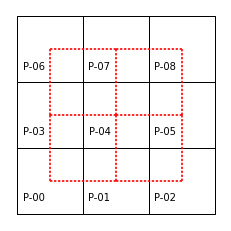

In [29]:
# visualize the new lattice
f,ax = plt.subplots(1,1, subplot_kw=dict(aspect='equal')) # sw: two overlapping lattice plots.
w.plot(gdf, edge_kws=dict(color='r', linestyle=':'), ax =ax) # sw: plot the red dash lines.
gdf.plot(facecolor='w', edgecolor='k', ax=ax) # sw: plot the black grids.
[ax.text(x, y, t, 
          verticalalignment='center',
          horizontalalignment='center') for x, y, t in zip(
         [p.centroid.x-.25 for p in polys],
         [p.centroid.y-.25 for p in polys],
         [i for i in gdf['id']])] # sw: plot the texts
plt.gca().set_axis_off() # sw: turn off the axis


In [32]:
# sw: turn w to a full adjacency matrix using w.full().
pandas.DataFrame(*w.full()).astype(int)

,0,1,2,3,4,5,6,7,8
0,0,1,0,1,0,0,0,0,0
1,1,0,1,0,1,0,0,0,0
2,0,1,0,0,0,1,0,0,0
3,1,0,0,0,1,0,1,0,0
4,0,1,0,1,0,1,0,1,0
5,0,0,1,0,1,0,0,0,1
6,0,0,0,1,0,0,0,1,0
7,0,0,0,0,1,0,1,0,1
8,0,0,0,0,0,1,0,1,0


In [37]:
# Queen contiguity
# do a regular 3x3 lattice and draw it here
w = weights.contiguity.Queen.from_dataframe(gdf)
w.neighbors

{0: [1, 3, 4],
 1: [0, 2, 3, 4, 5],
 2: [1, 4, 5],
 3: [0, 1, 4, 6, 7],
 4: [0, 1, 2, 3, 5, 6, 7, 8],
 5: [1, 2, 4, 7, 8],
 6: [3, 4, 7],
 7: [3, 4, 5, 6, 8],
 8: [4, 5, 7]}

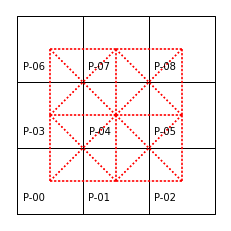

In [38]:
# plot similar to above.
f,ax = plt.subplots(1,1, subplot_kw=dict(aspect='equal'))
w.plot(gdf, edge_kws=dict(color='r', linestyle=':'), ax =ax)
gdf.plot(facecolor='w', edgecolor='k', ax=ax)
[ax.text(x, y, t, 
          verticalalignment='center',
          horizontalalignment='center') for x, y, t in zip(
         [p.centroid.x-.25 for p in polys],
         [p.centroid.y-.25 for p in polys],
         [i for i in gdf['id']])]
plt.gca().set_axis_off()

In [39]:
w.weights

{0: [1.0, 1.0, 1.0],
 1: [1.0, 1.0, 1.0, 1.0, 1.0],
 2: [1.0, 1.0, 1.0],
 3: [1.0, 1.0, 1.0, 1.0, 1.0],
 4: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 5: [1.0, 1.0, 1.0, 1.0, 1.0],
 6: [1.0, 1.0, 1.0],
 7: [1.0, 1.0, 1.0, 1.0, 1.0],
 8: [1.0, 1.0, 1.0]}

In [40]:
w.cardinalities # sw: cardinalities of each node

{0: 3, 1: 5, 2: 3, 3: 5, 4: 8, 5: 5, 6: 3, 7: 5, 8: 3}

In [41]:
w.histogram # sw: histogram of the cardinalities

[(3, 4), (4, 0), (5, 4), (6, 0), (7, 0), (8, 1)]

<AxesSubplot:ylabel='Frequency'>

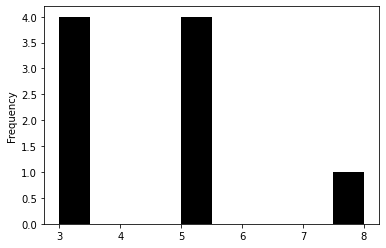

In [44]:
pandas.Series(w.cardinalities).plot.hist(color = 'k')

In [45]:
w.s0 # sw: what is this?

40.0

In [46]:
w.pct_nonzero # density of spatial weighting. sw: what is it?

49.382716049382715

# Spatial weights from real-world data

In [50]:
san_diego_tracts = geopandas.read_file('data_shenhao/sandiego/sandiego_tracts.gpkg')
san_diego_tracts # sw: it is a geopandas df

,GEOID,median_age,total_pop,total_pop_white,tt_work,hh_total,hh_female,total_bachelor,median_hh_income,income_gini,...,state,county,tract,area_sqm,pct_rented,pct_hh_female,pct_bachelor,pct_white,sub_30,geometry
0,06073018300,37.1,2590.0,2375.0,1299.0,2590.0,137.0,0.0,62500.0,0.5355,...,06,073,018300,2.876449,0.373913,0.052896,0.000000,0.916988,False,"POLYGON ((-13069450.120 3922380.770, -13069175..."
1,06073018601,41.2,5147.0,4069.0,1970.0,5147.0,562.0,24.0,88165.0,0.4265,...,06,073,018601,4.548797,0.205144,0.109190,0.004663,0.790558,False,"POLYGON ((-13067719.770 3922939.420, -13067631..."
2,06073017601,54.4,5595.0,4925.0,1702.0,5595.0,442.0,34.0,110804.0,0.4985,...,06,073,017601,8.726275,0.279029,0.078999,0.006077,0.880250,False,"POLYGON ((-13058166.110 3907247.690, -13058140..."
3,06073019301,42.3,7026.0,5625.0,3390.0,7026.0,638.0,46.0,100539.0,0.4003,...,06,073,019301,3.519743,0.196512,0.090806,0.006547,0.800598,False,"POLYGON ((-13056896.290 3925255.610, -13056868..."
4,06073018700,21.8,40402.0,30455.0,24143.0,40402.0,2456.0,23.0,41709.0,0.3196,...,06,073,018700,559.150793,0.949887,0.060789,0.000569,0.753799,False,"POLYGON ((-13090788.510 3946435.430, -13090736..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623,06073020709,41.6,7848.0,5633.0,3512.0,7848.0,808.0,88.0,95132.0,0.3628,...,06,073,020709,107.593049,0.127660,0.102956,0.011213,0.717762,False,"POLYGON ((-13029476.960 3912060.390, -13029476..."
624,06073020805,36.2,3624.0,2759.0,1681.0,3624.0,392.0,0.0,63820.0,0.3498,...,06,073,020805,7.239568,0.341730,0.108168,0.000000,0.761313,False,"POLYGON ((-13014919.160 3898901.850, -13014868..."
625,06073020810,44.5,5261.0,4977.0,2101.0,5261.0,617.0,26.0,106319.0,0.3336,...,06,073,020810,39.028783,0.111605,0.117278,0.004942,0.946018,False,"POLYGON ((-13009524.170 3896636.950, -13009524..."
626,06073021206,46.0,3065.0,2628.0,1373.0,3065.0,303.0,15.0,104375.0,0.4050,...,06,073,021206,42.849263,0.098882,0.098858,0.004894,0.857423,False,"POLYGON ((-13002757.840 3875229.320, -13002735..."


In [68]:
san_diego_tracts.columns

Index(['GEOID', 'median_age', 'total_pop', 'total_pop_white', 'tt_work',
       'hh_total', 'hh_female', 'total_bachelor', 'median_hh_income',
       'income_gini', 'total_housing_units', 'total_rented', 'median_no_rooms',
       'median_house_value', 'NAME', 'state', 'county', 'tract', 'area_sqm',
       'pct_rented', 'pct_hh_female', 'pct_bachelor', 'pct_white', 'sub_30',
       'geometry'],
      dtype='object')

In [51]:
wq = weights.contiguity.Queen.from_dataframe(san_diego_tracts) # sw: Queen contiguity.

In [ ]:
# visualize the geo df and the new graph!
ax = san_diego_tracts.plot(edgecolor='k', facecolor='w', figsize = (10,10))
wq.plot(san_diego_tracts, ax=ax, 
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax.set_axis_off()

(-13040000.0, -13020000.0, 3850000.0, 3860000.0)

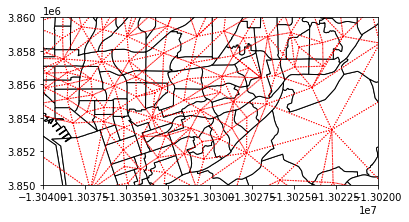

In [54]:
# visualize the details of the dense area.
ax = san_diego_tracts.plot(edgecolor='k', facecolor='w')
f,ax = wq.plot(san_diego_tracts, ax=ax, 
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker=''))
ax.axis([-13040000,  -13020000, 3850000, 3860000]) # sw: choose axis values to show a subset of the full graph.
#ax.set_axis_off()

In [57]:
print(wq.n) # sw: no clue what they are.
print(wq.pct_nonzero)
print(wq.weights)

628
1.018296888311899
{0: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 1: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 2: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 3: [1.0, 1.0, 1.0, 1.0], 4: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 5: [1.0, 1.0, 1.0, 1.0, 1.0], 6: [1.0, 1.0, 1.0, 1.0], 7: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 8: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 9: [1.0, 1.0, 1.0, 1.0], 10: [1.0, 1.0, 1.0, 1.0, 1.0], 11: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 12: [1.0, 1.0, 1.0, 1.0, 1.0], 13: [1.0, 1.0, 1.0], 14: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 15: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 16: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 17: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 18: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 19: [1.0, 1.0, 1.0, 1.0], 20: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 21: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 22: [1.0, 1.0, 1.0, 1.0, 1.0], 23: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 24: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], 25: [1.0, 1.0, 1.0, 1.0, 1.0], 26: [1.0, 1.0, 1.0, 1.0, 1

<AxesSubplot:ylabel='Frequency'>

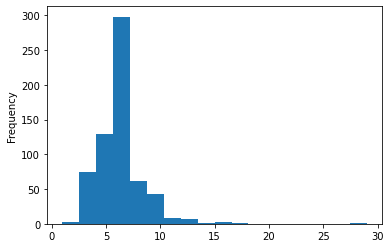

In [56]:
s = pandas.Series(wq.cardinalities)
s.plot.hist(bins=s.unique().shape[0])

0.8722463385938578


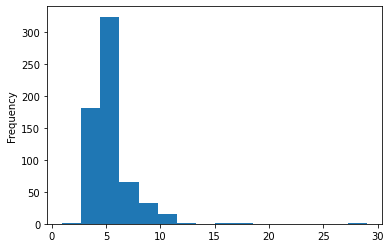

In [58]:
# create a rook weights
wr = weights.contiguity.Rook.from_dataframe(san_diego_tracts)
print(wr.pct_nonzero)
s = pandas.Series(wr.cardinalities)
s.plot.hist(bins=s.unique().shape[0]);

# Distance based weights

## KNN weights

In [59]:
wk4 = weights.distance.KNN.from_dataframe(san_diego_tracts, k=4)

In [60]:
wk4.islands # sw Q: what is an island?

[]

In [61]:
wk4.histogram # sw: KNN creates a very balanced weighting graph.

[(4, 628)]

In [62]:
wk4.weights

{0: [1.0, 1.0, 1.0, 1.0],
 1: [1.0, 1.0, 1.0, 1.0],
 2: [1.0, 1.0, 1.0, 1.0],
 3: [1.0, 1.0, 1.0, 1.0],
 4: [1.0, 1.0, 1.0, 1.0],
 5: [1.0, 1.0, 1.0, 1.0],
 6: [1.0, 1.0, 1.0, 1.0],
 7: [1.0, 1.0, 1.0, 1.0],
 8: [1.0, 1.0, 1.0, 1.0],
 9: [1.0, 1.0, 1.0, 1.0],
 10: [1.0, 1.0, 1.0, 1.0],
 11: [1.0, 1.0, 1.0, 1.0],
 12: [1.0, 1.0, 1.0, 1.0],
 13: [1.0, 1.0, 1.0, 1.0],
 14: [1.0, 1.0, 1.0, 1.0],
 15: [1.0, 1.0, 1.0, 1.0],
 16: [1.0, 1.0, 1.0, 1.0],
 17: [1.0, 1.0, 1.0, 1.0],
 18: [1.0, 1.0, 1.0, 1.0],
 19: [1.0, 1.0, 1.0, 1.0],
 20: [1.0, 1.0, 1.0, 1.0],
 21: [1.0, 1.0, 1.0, 1.0],
 22: [1.0, 1.0, 1.0, 1.0],
 23: [1.0, 1.0, 1.0, 1.0],
 24: [1.0, 1.0, 1.0, 1.0],
 25: [1.0, 1.0, 1.0, 1.0],
 26: [1.0, 1.0, 1.0, 1.0],
 27: [1.0, 1.0, 1.0, 1.0],
 28: [1.0, 1.0, 1.0, 1.0],
 29: [1.0, 1.0, 1.0, 1.0],
 30: [1.0, 1.0, 1.0, 1.0],
 31: [1.0, 1.0, 1.0, 1.0],
 32: [1.0, 1.0, 1.0, 1.0],
 33: [1.0, 1.0, 1.0, 1.0],
 34: [1.0, 1.0, 1.0, 1.0],
 35: [1.0, 1.0, 1.0, 1.0],
 36: [1.0, 1.0, 1.0, 1.0],
 37: [1.0, 

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

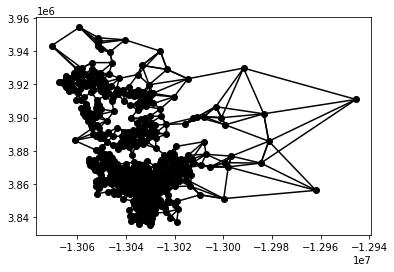

In [64]:
wk4.plot(san_diego_tracts) # sw: my stupid plot. 

## Kernel weights from 
https://pysal.org/libpysal/generated/libpysal.weights.Kernel.html


1. Bandwidth: cutoff distance to compute the weights. e.g. bandwidth=20. $h_i = 20$ implies a fixed bandwidth for all the points.
2. $z_{i,j}$ implies normalized distances between point i and j. 
3. Kernel function $K(z)$ returns a value inversely proportional to $z_{i,j}$. e.g. default: function = 'triangular', $K(z)= 1 - |z|$

Overall, Kernel will return a weight dictionary, in which each row represents weights inversely proportional to distance and normalized to ones. Examples are as follows


In [54]:
from libpysal.weights import Kernel
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix

In [55]:
points=[(10, 10), (20, 10), (40, 10), (15, 20), (30, 20), (30, 30)]
x, y = zip(*points) # sw Q: meaning of * in python? 

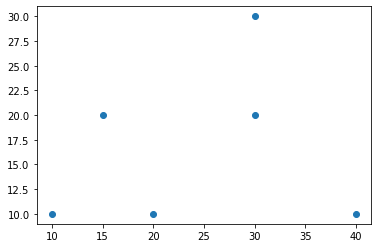

In [56]:
plt.scatter(x, y)

In [57]:
# sw: Show the results with fixed bandwidth, triangular kernel, KNN=2 (to determine bandwidth).
# sw: k is the number of nearest neighbors used to compute the fixed bandwidth. Not sure about the exact meaning.
kw=Kernel(points,
          bandwidth=20.5,
          fixed=True,
          k=2,
          distance_metric='euclidean',
          function='triangular')


In [58]:
kw.weights[0]

[1.0, 0.5121951219512195, 0.45461756646346585]

In [59]:
print(kw.neighbors[0]) # 0,1,3 are points with distance<20.5.
print(kw.neighbors[1]) # 0,1,2,3,4 are points with distance<20.5.
print(kw.neighbors[2]) 
print(kw.neighbors[3]) 


[0, 1, 3]
[0, 1, 2, 3, 4]
[1, 2, 4]
[0, 1, 3, 4, 5]


In [60]:
kw.bandwidth 
# sw: Fixed bandwidth for all the points. 


array([[20.5],
       [20.5],
       [20.5],
       [20.5],
       [20.5],
       [20.5]])

In [61]:
# dynamic bandwidth. 
bw=[25.0, 15.0, 5.0, 16.0, 14.5, 25.0]
kwa=Kernel(points,bandwidth=bw)


In [62]:
# 0. bandwidth = 25 
print(kwa.neighbors[0])
print(kwa.weights[0])

# 1. bandwidth = 15;only points closer than 15 are included.
print(kwa.neighbors[1])
print(kwa.weights[1])

# 2. bandwidth = 5; only points closer than 5 are included. Hence no neighbor at all.
print(kwa.neighbors[2])
print(kwa.weights[2])



[0, 1, 3, 4]
[1.0, 0.6, 0.552786404500042, 0.10557280900008403]
[0, 1, 3, 4]
[0.33333333333333337, 1.0, 0.2546440075000701, 0.057190958417936644]
[2]
[1.0]


In [63]:
# Q: How to replace the kernel weights by the euclidean distance?
# A: Just reverse the function of a kernel.
for i in kw.neighbors.keys():
    for j_idx in range(len(kw.neighbors[i])):
        j = kw.neighbors[i][j_idx]
        # note that kw.weights indices are 
        # i (node index), j_idx (index of the node on the list - not node index!)
        weight = kw.weights[i][j_idx]
        distance = (1 - weight)*kw.bandwidth[i]
        kw.weights[i][j_idx] = distance[0]

kw.weights

{0: [0.0, 10.0, 11.18033988749895],
 1: [10.0, 0.0, 20.0, 11.18033988749895, 14.142135623730951],
 2: [20.0, 0.0, 14.142135623730951],
 3: [11.18033988749895, 11.18033988749895, 0.0, 15.0, 18.027756377319946],
 4: [14.142135623730951, 14.142135623730951, 15.0, 0.0, 10.0],
 5: [18.027756377319946, 10.0, 0.0]}

In [64]:
kw.neighbors

{0: [0, 1, 3],
 1: [0, 1, 2, 3, 4],
 2: [1, 2, 4],
 3: [0, 1, 3, 4, 5],
 4: [1, 2, 3, 4, 5],
 5: [3, 4, 5]}

In [65]:
kw.weights

{0: [0.0, 10.0, 11.18033988749895],
 1: [10.0, 0.0, 20.0, 11.18033988749895, 14.142135623730951],
 2: [20.0, 0.0, 14.142135623730951],
 3: [11.18033988749895, 11.18033988749895, 0.0, 15.0, 18.027756377319946],
 4: [14.142135623730951, 14.142135623730951, 15.0, 0.0, 10.0],
 5: [18.027756377319946, 10.0, 0.0]}

## Kernel weights

In [65]:
w_kernel = weights.distance.Kernel.from_dataframe(gdf)
# sw: key parameters to adjust here: kernel function and bandwidth. 
# Default: triangular kernel and knn=2 distance. 
# sw Q: What is the use of bandwidth? 
# sw Q: It is unclear how the distances are exactly computed? 

In [66]:
w_kernel.function

'triangular'

In [67]:
w_kernel.bandwidth[0:5]

array([[1.0000001],
       [1.0000001],
       [1.0000001],
       [1.0000001],
       [1.0000001]])

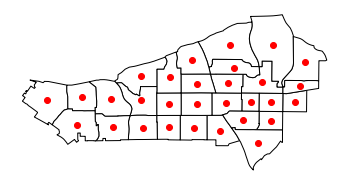

In [69]:
# Plot a subset of the San Diego dataset
sub_30 = san_diego_tracts.query("sub_30 == True")
ax = sub_30.plot(facecolor='w', edgecolor='k')
sub_30.head(30).centroid.plot(color='r', ax=ax)
ax.set_axis_off()

In [74]:
w_adaptive = weights.distance.Kernel.from_dataframe(sub_30, fixed=False, k=5) 
# sw: not fixed bandwidth. K=15.
w_adaptive.bandwidth

array([[3783.55870791],
       [2082.25513388],
       [1606.12096386],
       [1636.51396538],
       [1638.85416846],
       [1487.33142257],
       [1190.26229402],
       [1366.34009572],
       [2107.29117727],
       [1729.4638175 ],
       [1734.62386904],
       [1707.29787782],
       [1443.64721071],
       [1934.78064755],
       [1240.52406743],
       [1535.58486401],
       [1973.54301454],
       [2393.79038085],
       [1397.77147377],
       [1103.15036717],
       [1535.73985542],
       [1324.42773488],
       [1546.20005677],
       [1364.78097583],
       [2651.10042682],
       [1487.33142257],
       [1701.48459926],
       [1118.03361609],
       [1711.93088185],
       [1816.1750061 ]])

In [75]:
w_adaptive.weights.keys()

dict_keys([19, 25, 28, 111, 121, 175, 184, 185, 190, 254, 327, 328, 330, 335, 337, 338, 343, 406, 411, 417, 418, 420, 489, 490, 569, 576, 580, 583, 585, 591])

In [76]:
w_adaptive.weights.values()

dict_values([[1.0, 0.6300490165995968, 0.5867704898429487, 0.3283398198121764, 0.24864340304013532, 9.99999900663795e-08], [1.0, 0.5238334915722047, 0.45508616689234394, 0.2493988046839607, 0.2362198864717009, 9.99999900663795e-08], [1.0, 0.3693987451422148, 0.3230616281238039, 0.29076567822772514, 0.1011591911043096, 9.99999900663795e-08], [1.0, 0.41797065851863324, 0.39145594466709643, 0.3356335886454823, 0.16604387849638635, 9.99999900663795e-08], [1.0, 0.5961978556042251, 0.40873210993093745, 0.24305410008141515, 0.04178840301553466, 9.99999900663795e-08], [1.0, 0.33336972398448483, 0.26604420623325453, 0.24838007813019658, 0.16393464478039643, 9.99999899553572e-08], [1.0, 0.3212883033943428, 0.19545097622840513, 0.173757500644256, 0.04297051312704103, 9.99999900663795e-08], [1.0, 0.5187287042512567, 0.4087526645042029, 0.12732561849573276, 0.09678854507029278, 9.99999899553572e-08], [1.0, 0.5359381706302881, 0.30956943822241234, 0.2222935196340048, 0.09855715253031305, 9.999998995

[None, None]

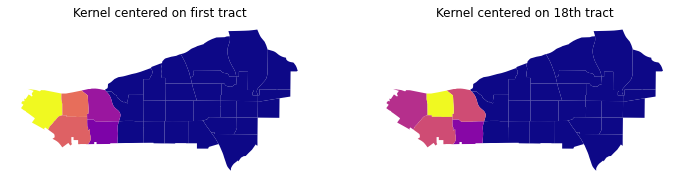

In [77]:
# vis
full_matrix, ids = w_adaptive.full() 
f,ax = plt.subplots(1,2,figsize=(12,6), subplot_kw=dict(aspect='equal'))
sub_30.assign(weight_0 = full_matrix[0]).plot("weight_0", cmap='plasma', ax=ax[0])
sub_30.assign(weight_15 = full_matrix[17]).plot("weight_15", cmap='plasma', ax=ax[1])
ax[0].set_title("Kernel centered on first tract")
ax[1].set_title("Kernel centered on 18th tract")
[ax_.set_axis_off() for ax_ in ax]

## Distance bands and hybrid Weights

In [78]:
w_bdb = weights.distance.DistanceBand.from_dataframe(gdf, 1.5, binary=True)
# It combines continuous and discrete weights. 
# 1.5 is a discrete threshold. 
# sw Q: How to use the threshold? 

In [79]:
w_hy = weights.distance.DistanceBand.from_dataframe(gdf, 1.5, binary=False)

/home/jtl/anaconda3/lib/python3.7/site-packages/scipy/sparse/data.py:117: RuntimeWarning: divide by zero encountered in reciprocal
  return self._with_data(data ** n)


In [80]:
w_hy.weights

{0: [1.0, 1.0, 0.7071067811865475],
 1: [1.0, 1.0, 0.7071067811865475, 1.0, 0.7071067811865475],
 2: [1.0, 0.7071067811865475, 1.0],
 3: [1.0, 0.7071067811865475, 1.0, 1.0, 0.7071067811865475],
 4: [0.7071067811865475,
  1.0,
  0.7071067811865475,
  1.0,
  1.0,
  0.7071067811865475,
  1.0,
  0.7071067811865475],
 5: [0.7071067811865475, 1.0, 1.0, 0.7071067811865475, 1.0],
 6: [1.0, 0.7071067811865475, 1.0],
 7: [0.7071067811865475, 1.0, 0.7071067811865475, 1.0, 1.0],
 8: [0.7071067811865475, 1.0, 1.0]}

## Great Circle distances

In [ ]:
# Weights taking into account Earth's surface. 

In [83]:
texas = geopandas.read_file('data_shenhao/texas/texas.shp')
knn4_bad = weights.distance.KNN.from_dataframe(texas, k=4) # ignore curvature of the earth

In [84]:
knn4_bad.histogram

[(4, 254)]

In [85]:
knn4_bad.weights

{0: [1.0, 1.0, 1.0, 1.0],
 1: [1.0, 1.0, 1.0, 1.0],
 2: [1.0, 1.0, 1.0, 1.0],
 3: [1.0, 1.0, 1.0, 1.0],
 4: [1.0, 1.0, 1.0, 1.0],
 5: [1.0, 1.0, 1.0, 1.0],
 6: [1.0, 1.0, 1.0, 1.0],
 7: [1.0, 1.0, 1.0, 1.0],
 8: [1.0, 1.0, 1.0, 1.0],
 9: [1.0, 1.0, 1.0, 1.0],
 10: [1.0, 1.0, 1.0, 1.0],
 11: [1.0, 1.0, 1.0, 1.0],
 12: [1.0, 1.0, 1.0, 1.0],
 13: [1.0, 1.0, 1.0, 1.0],
 14: [1.0, 1.0, 1.0, 1.0],
 15: [1.0, 1.0, 1.0, 1.0],
 16: [1.0, 1.0, 1.0, 1.0],
 17: [1.0, 1.0, 1.0, 1.0],
 18: [1.0, 1.0, 1.0, 1.0],
 19: [1.0, 1.0, 1.0, 1.0],
 20: [1.0, 1.0, 1.0, 1.0],
 21: [1.0, 1.0, 1.0, 1.0],
 22: [1.0, 1.0, 1.0, 1.0],
 23: [1.0, 1.0, 1.0, 1.0],
 24: [1.0, 1.0, 1.0, 1.0],
 25: [1.0, 1.0, 1.0, 1.0],
 26: [1.0, 1.0, 1.0, 1.0],
 27: [1.0, 1.0, 1.0, 1.0],
 28: [1.0, 1.0, 1.0, 1.0],
 29: [1.0, 1.0, 1.0, 1.0],
 30: [1.0, 1.0, 1.0, 1.0],
 31: [1.0, 1.0, 1.0, 1.0],
 32: [1.0, 1.0, 1.0, 1.0],
 33: [1.0, 1.0, 1.0, 1.0],
 34: [1.0, 1.0, 1.0, 1.0],
 35: [1.0, 1.0, 1.0, 1.0],
 36: [1.0, 1.0, 1.0, 1.0],
 37: [1.0, 

In [86]:
radius = geometry.sphere.RADIUS_EARTH_MILES
radius

3958.755865744055

In [87]:
knn4 = weights.distance.KNN.from_dataframe(texas, k=4, radius=radius) # incorporate earth curvature

## Set Operations
Ignored

## Block Weights

In [88]:
san_diego_tracts[['GEOID', 'state', 'county', 'tract']].head()

,GEOID,state,county,tract
0,06073018300,06,073,018300
1,06073018601,06,073,018601
2,06073017601,06,073,017601
3,06073019301,06,073,019301
4,06073018700,06,073,018700


In [89]:
# use counties to build spatial clusters (blocks)
# NOTE: since this is a large dataset, it might take a while to process
w_bl = weights.util.block_weights(san_diego_tracts['county'].values, 
                                  ids=san_diego_tracts['GEOID'].values)

In [93]:
print(len(w_bl.weights.keys()))

628


## Visualizing weight set operations

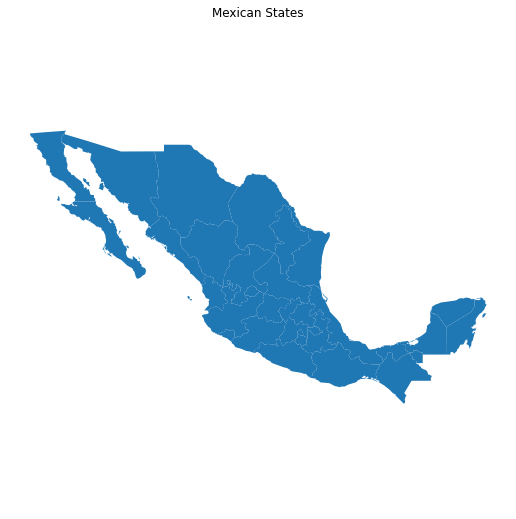

In [95]:
mx = geopandas.read_file('data_shenhao/mexico/mexicojoin.shp')
f, ax = plt.subplots(1, figsize=(9, 9))
mx.plot(ax=ax)
ax.set_axis_off()
ax.set_title('Mexican States')
plt.axis('equal')
plt.show()

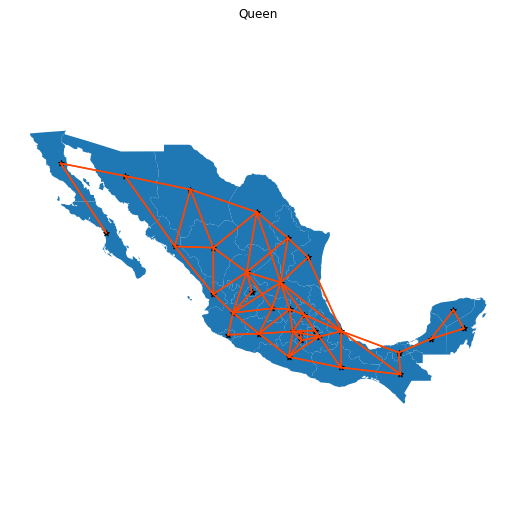

In [96]:
# vis
queen_mx = weights.contiguity.Queen.from_dataframe(mx)
f, ax = plt.subplots(1, figsize=(9, 9))
mx.plot(ax=ax)
queen_mx.plot(mx,edge_kws=dict(linewidth=1.5, color='orangered'), node_kws=dict(marker='*'),  ax=ax, )
ax.set_axis_off()
ax.set_title('Queen')
plt.axis('equal')
plt.show()

Text(0.5, 1.0, 'Mexican Regions')

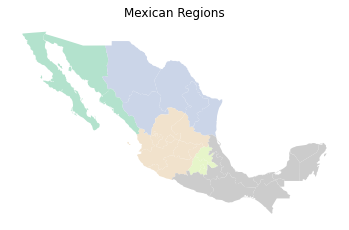

In [98]:
# vis blocks
ax = mx.plot(column='INEGI2', categorical=True, cmap='Pastel2')
ax.set_axis_off()
ax.set_title("Mexican Regions")

/home/jtl/anaconda3/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 5 disconnected components.
  warnings.warn(message)


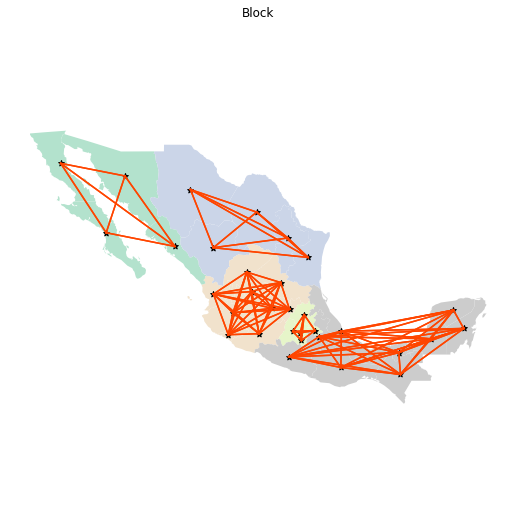

In [99]:
# create block weights and vis
block_mx = weights.util.block_weights(mx['INEGI2'].values)

# network vis
f, ax = plt.subplots(1, figsize=(9, 9))
mx.plot(column='INEGI2', categorical=True, 
        cmap='Pastel2', ax=ax)
block_mx.plot(mx, edge_kws=dict(linewidth=1.5, 
                                color='orangered'), 
                  node_kws=dict(marker='*'), ax=ax)
ax.set_axis_off()
ax.set_title('Block')
plt.axis('equal')
plt.show()


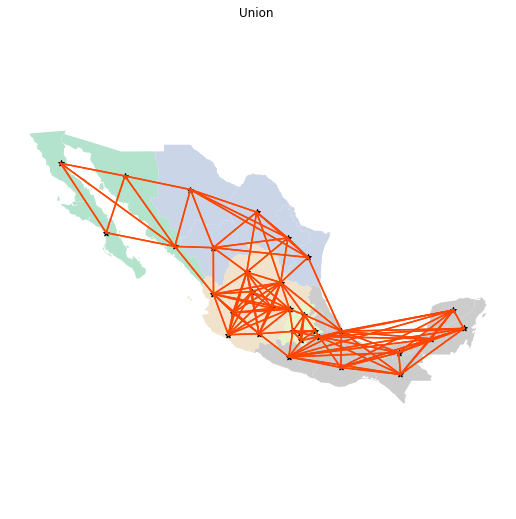

In [100]:
# create the union of block weights and queen contiguity.
union_mx = weights.set_operations.w_union(block_mx, queen_mx)

f, ax = plt.subplots(1, figsize=(9, 9))
mx.plot(column='INEGI2', categorical=True, cmap='Pastel2', ax=ax)
union_mx.plot(mx, edge_kws=dict(linewidth=1.5, 
                                color='orangered'), 
              node_kws=dict(marker='*'), ax=ax)
ax.set_axis_off()
ax.set_title('Union ')
plt.axis('equal')
plt.show()


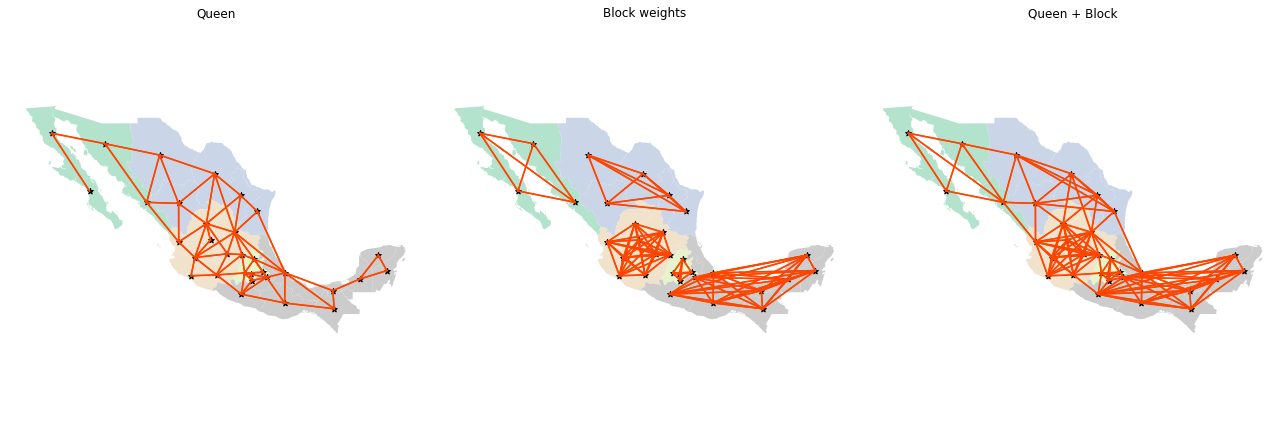

In [101]:
# compare the three graphs.
f, axs = plt.subplots(1, 3, figsize=(18, 6))

# Contiguity
ax = axs[0]
mx.plot(column='INEGI2', categorical=True, 
        cmap='Pastel2', ax=ax)
queen_mx.plot(mx, edge_kws=dict(linewidth=1.5, color='orangered'), 
              node_kws=dict(marker='*'), ax=ax)
ax.set_axis_off()
ax.set_title('Queen')
ax.axis('equal')

# Block
ax = axs[1]
mx.plot(column='INEGI2', categorical=True, 
        cmap='Pastel2', ax=ax)
block_mx.plot(mx, edge_kws=dict(linewidth=1.5, color='orangered'), 
              node_kws=dict(marker='*'), ax=ax)
ax.set_axis_off()
ax.set_title('Block weights')
ax.axis('equal')

# Union
ax = axs[2]
mx.plot(column='INEGI2', categorical=True, 
        cmap='Pastel2', ax=ax)
union_mx.plot(mx, edge_kws=dict(linewidth=1.5, color='orangered'), 
              node_kws=dict(marker='*'), ax=ax)
ax.set_axis_off()
ax.set_title('Queen + Block')
plt.axis('equal')
f.tight_layout()
plt.show()

# Use Case
ignored.